# K-Nearest Neighbor(KNN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
zoo = pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/13.KNN/zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
zoo["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

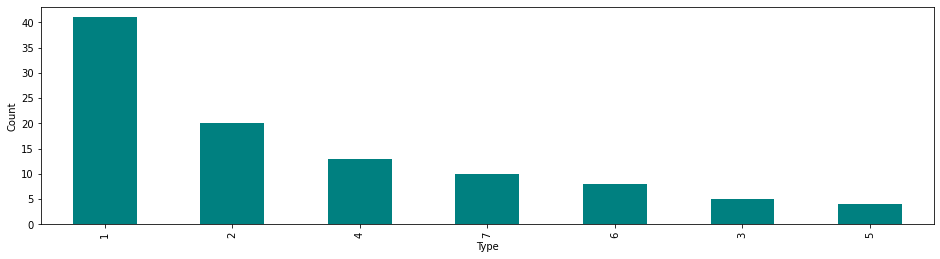

In [6]:
plt.figure(figsize=(16,4))
zoo.type.value_counts().plot(kind="bar",color="teal")
plt.xlabel("Type")
plt.ylabel("Count")
plt.plot();

In [7]:
X = zoo.iloc[:,1:-1]
Y = zoo.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=7)

In [8]:
model = KNeighborsClassifier(n_neighbors=5, metric = "minkowski" , p = 2) 
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print(round(result*100,2),"%")

85.29 %


In [9]:
kfold = KFold(n_splits=10)
model1 = KNeighborsClassifier(n_neighbors=3, metric = "minkowski" , p = 2) 
model1.fit(X_train, Y_train)
result1 = cross_val_score(model1,X_train,Y_train, cv=kfold)
print("Cross_val_score-",round(result1.mean()*100,2),"%")

Cross_val_score- 81.43 %


In [10]:
train_pred = model1.predict(X_train)
accuracy_train = np.mean(train_pred==Y_train)
test_pred = model1.predict(X_test)
accuracy_test = np.mean(test_pred==Y_test)
print("\nAccuracy on Train -",round(accuracy_train*100,2),"%","\nAccuracy on Test  -",round(accuracy_test*100,2)," %")
print(classification_report(Y_test,test_pred))


Accuracy on Train - 97.01 % 
Accuracy on Test  - 94.12  %
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         6
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        34
   macro avg       0.94      0.93      0.93        34
weighted avg       0.95      0.94      0.94        34



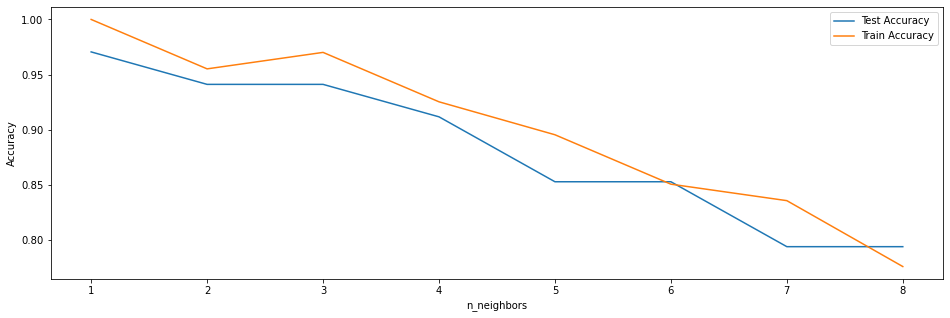

In [11]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

plt.figure(figsize=(16,5))
plt.plot(neighbors, test_accuracy, label = "Test Accuracy")
plt.plot(neighbors, train_accuracy, label = "Train Accuracy")
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show();

**Grid Search for Algorithm Tuning**

In [12]:
# giving params for grid search cv
n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

#applying grid search cv
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

#printing the best params
print(round(grid.best_score_*100,2),"%")
print(grid.best_params_)

97.0 %
{'n_neighbors': 1}


**Visualizing the CV results**

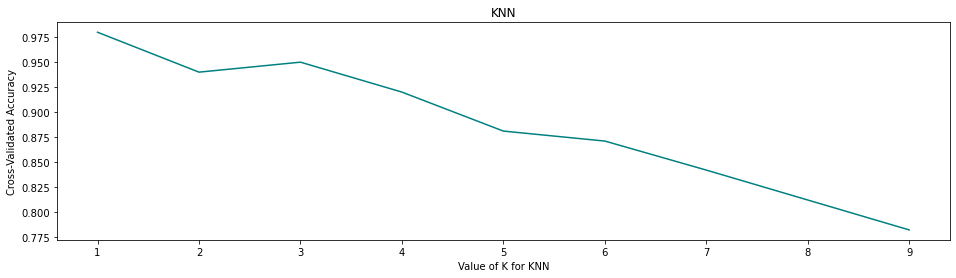

In [13]:
plt.figure(figsize=(16,4))
k_range = range(1, 10)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores,color="teal")
plt.title("KNN")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show();

**As per Grid Search CV K-value of 1 brings the highest accuracy value.**                           
## Final Model

In [14]:
model_final = KNeighborsClassifier(n_neighbors=3)
model_final.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Predict from newly created KNN model
pred = model_final.predict(X)
print(classification_report(Y, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        20
           3       1.00      0.60      0.75         5
           4       0.93      1.00      0.96        13
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        10

    accuracy                           0.98       101
   macro avg       0.96      0.94      0.94       101
weighted avg       0.98      0.98      0.98       101

